In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_train_path = r"C:\Users\king2\Desktop\imgcls\Fruits_Vegetables\train"
data_test_path = r"C:\Users\king2\Desktop\imgcls\Fruits_Vegetables\test"
data_val_path = r"C:\Users\king2\Desktop\imgcls\Fruits_Vegetables\validation"

In [5]:
img_width = 180
img_height =180 

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [23]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


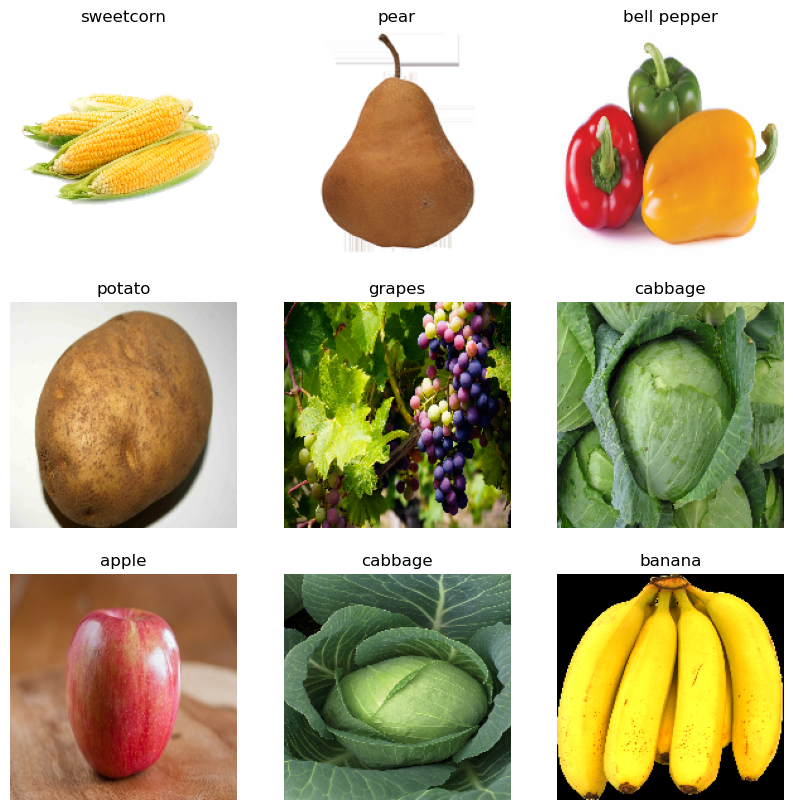

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.0541 - loss: 3.7305 - val_accuracy: 0.3504 - val_loss: 2.3484
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.2657 - loss: 2.4978 - val_accuracy: 0.5356 - val_loss: 1.6818
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.4385 - loss: 1.9393 - val_accuracy: 0.7493 - val_loss: 0.9167
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5850 - loss: 1.3956 - val_accuracy: 0.8120 - val_loss: 0.6554
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.7316 - loss: 0.8583 - val_accuracy: 0.8832 - val_loss: 0.4709
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.8581 - loss: 0.4775 - val_accuracy: 0.9202 - val_loss: 0.3692
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9252 - loss: 0.2913 - val_accuracy: 0.9487 - val_loss: 0.2507
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9454 - loss: 0.2101 - val_accu

Text(0.5, 1.0, 'Loss')

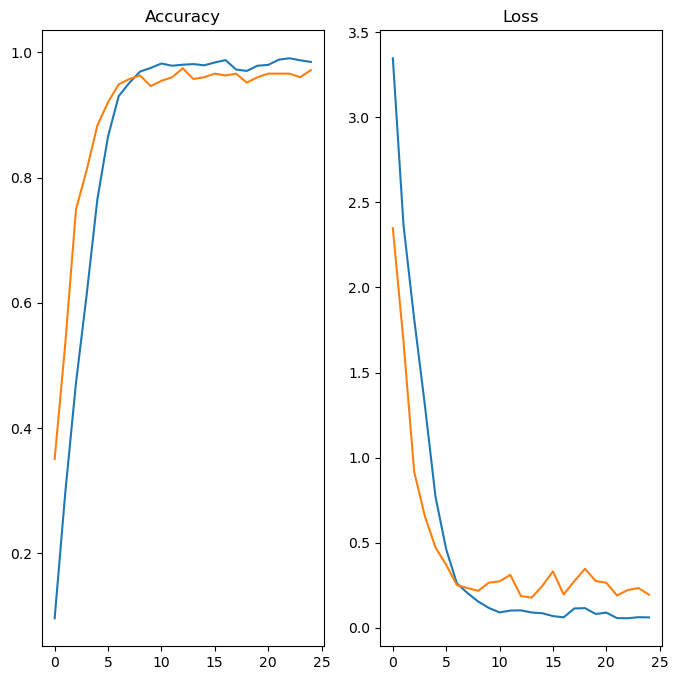

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [18]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [19]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [20]:
score = tf.nn.softmax(predict)

In [21]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 98.44


In [22]:
model.save('Image_classify.keras')